# Which csv?

## database.csv or fatalencounters??? or both??

We are going to try to see if we can use the name as a temporary key to mix the two databases

In [1]:
# Importing pandas

import pandas as pd
import datetime as dt

In [4]:
# Importing the 2 databases

wpost = pd.read_csv ('../data/database.csv')
fenc = pd.read_csv ('../data/fatalencounters.csv')

In [6]:
wpost.shape, fenc.shape

((2142, 14), (20792, 24))

In [7]:
wpost.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

In [11]:
fenc['Date (Year)'].min(), fenc['Date (Year)'].max()

(2000, 2100)

In [15]:
fenc = fenc.drop(20791)

In [17]:
fenc['Date (Year)'].min(), fenc['Date (Year)'].max()

(2000, 2017)

In [20]:
wpost.date.min(), wpost.date.max()

('2015-01-02', '2017-02-28')

In [27]:
fenc[fenc['Date (Year)'] >= 2015].shape

(3919, 25)

In [106]:
for column in fenc.columns:
    print(column, len(fenc[column].unique()))

Timestamp 20791
Subject's name 20040
Subject's age 123
Subject's gender 4
Subject's race 8
URL of image of deceased 7009
Date of injury resulting in death (month/day/year) 5973
Location of injury (address) 19121
Location of death (city) 4892
Location of death (state) 51
Location of death (zip code) 8591
Location of death (county) 1364
Agency responsible for death 5830
Cause of death 15
A brief description of the circumstances surrounding the death 19830
Official disposition of death (justified or other) 55
Link to news article or photo of official document 19293
Symptoms of mental illness? 5
Unique identifier/submitted by 827
State Data Status Prior to Jan. 1, 2013. All states complete after Jan. 1, 2013 2
Date&Description 19868
20791 32
Unique identifier 20791
Date (Year) 18
date 1


In [33]:
#len(wpost.race.unique())

for column in wpost.columns:
    print(column, len(wpost[column].unique()))

id 2142
name 2119
date 739
manner_of_death 2
armed 65
age 72
gender 3
race 7
city 1247
state 51
signs_of_mental_illness 2
threat_level 3
flee 5
body_camera 2


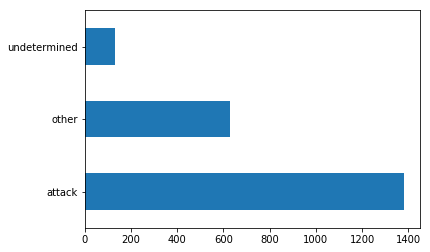

In [37]:
%matplotlib inline

wpost.threat_level.value_counts().plot.barh()

In [38]:
threats = wpost.threat_level.value_counts()

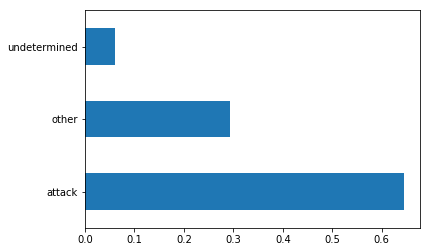

In [42]:
(threats/threats.sum()).plot.barh()

In [45]:
wpost.date.isnull().sum()

0

In [46]:
# Counting NaNs

wpost.isnull().sum()

id                           0
name                        19
date                         0
manner_of_death              0
armed                        6
age                         43
gender                       1
race                       103
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        36
body_camera                  0
dtype: int64

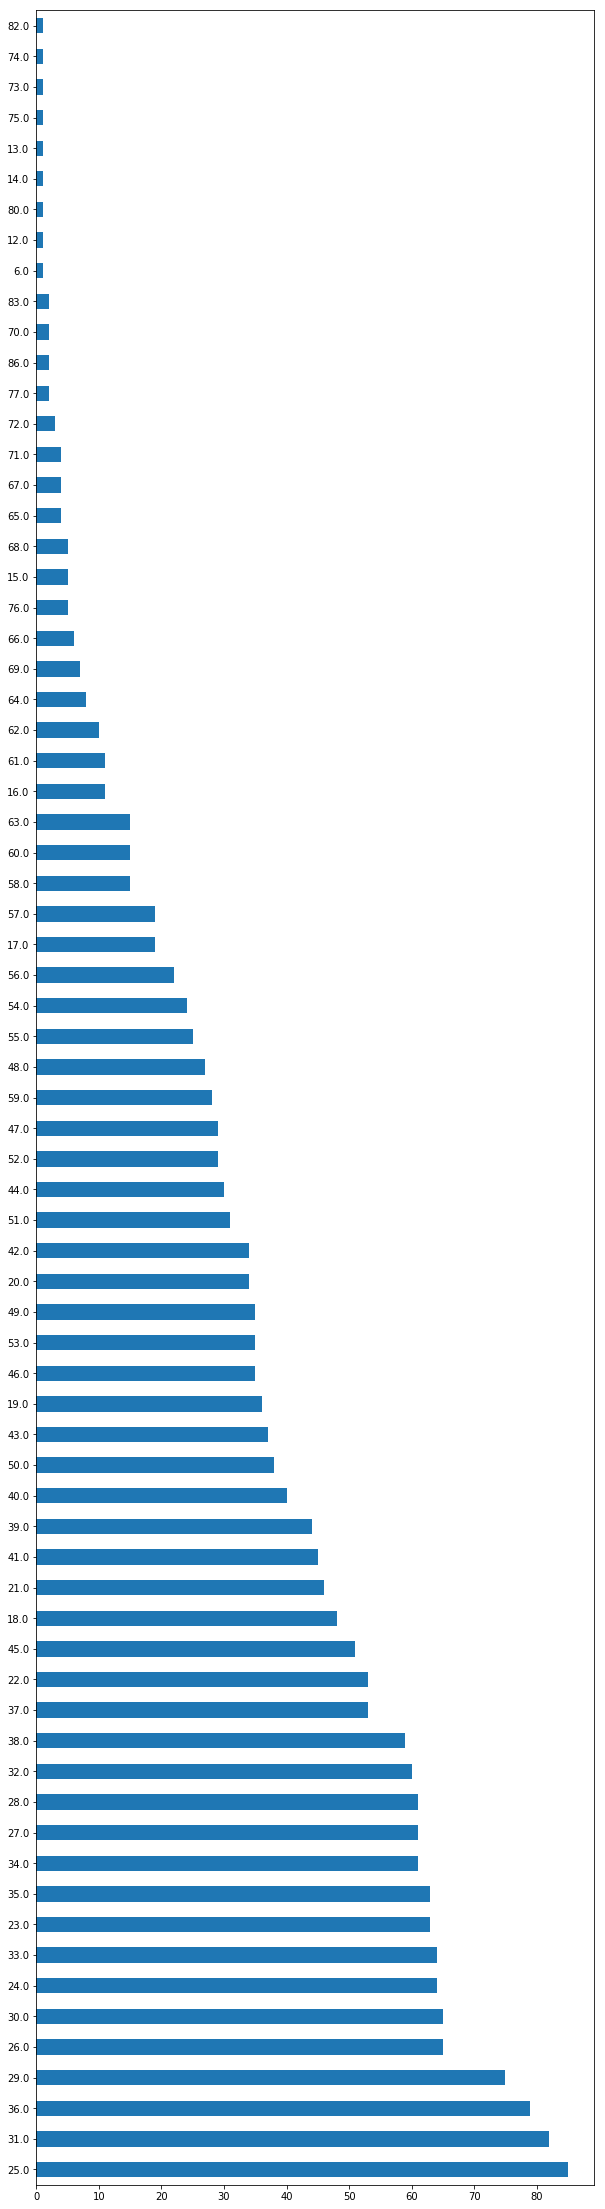

In [50]:
wpost.age.value_counts().plot.barh(figsize=(10,40))

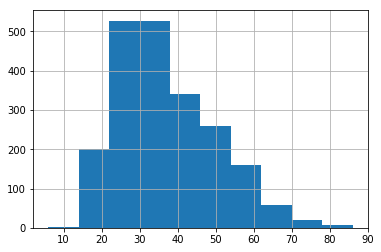

In [51]:
wpost.age.hist()

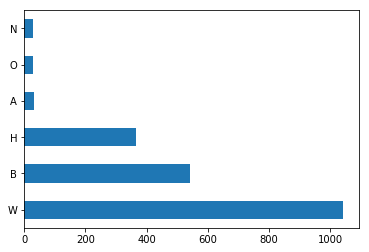

In [52]:
wpost.race.value_counts().plot.barh()

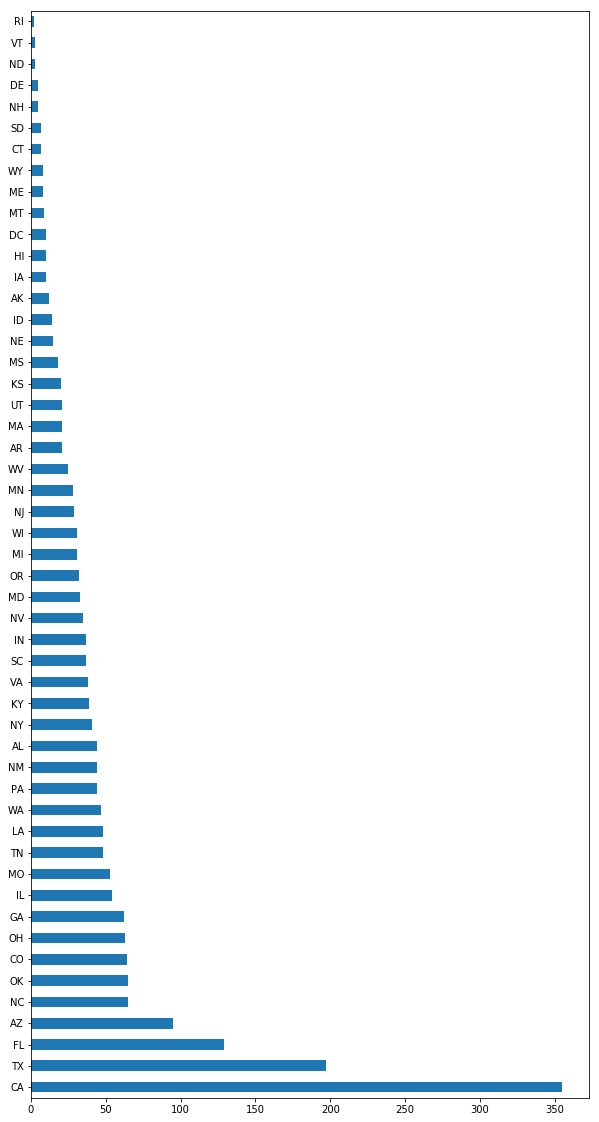

In [58]:
wpost.state.value_counts().plot.barh(figsize=(10,20))

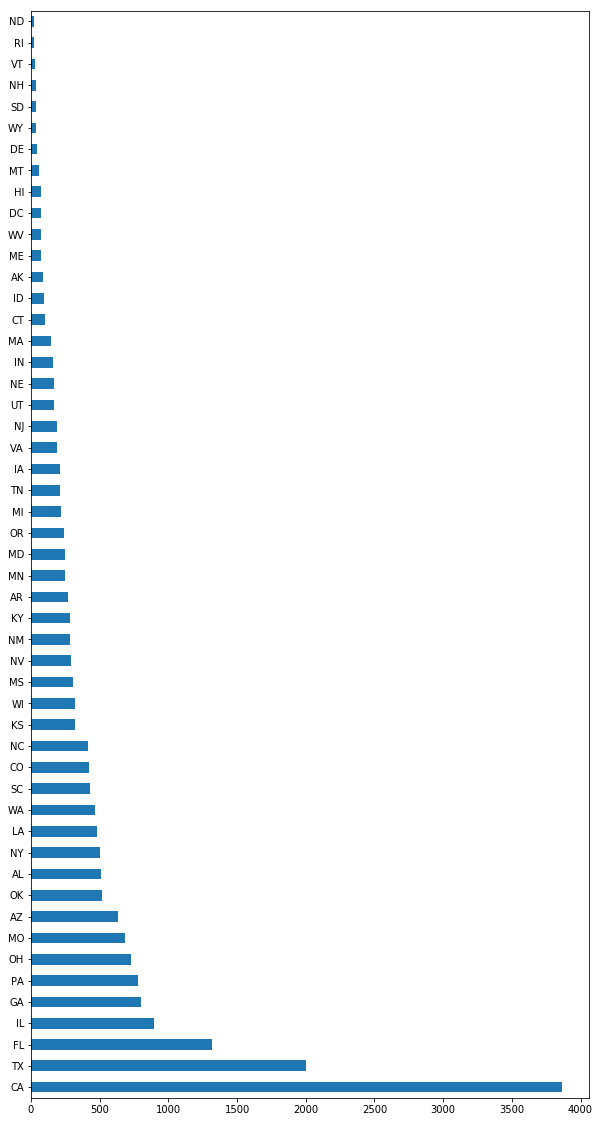

In [59]:
fenc['Location of death (state)'].value_counts().plot.barh(figsize=(10,20))

In [60]:
fenc_states = fenc['Location of death (state)'].value_counts()
wpost_states = wpost.state.value_counts()

In [61]:
fenc_states.index

Index(['CA', 'TX', 'FL', 'IL', 'GA', 'PA', 'OH', 'MO', 'AZ', 'OK', 'AL', 'NY',
       'LA', 'WA', 'SC', 'CO', 'NC', 'KS', 'WI', 'MS', 'NV', 'NM', 'KY', 'AR',
       'MN', 'MD', 'OR', 'MI', 'TN', 'IA', 'VA', 'NJ', 'UT', 'NE', 'IN', 'MA',
       'CT', 'ID', 'AK', 'ME', 'WV', 'DC', 'HI', 'MT', 'DE', 'WY', 'SD', 'NH',
       'VT', 'RI', 'ND'],
      dtype='object')

In [68]:
fstates_l  = set(fenc_states.index)

In [69]:
wstates_l = set(wpost_states.index)

In [72]:
compare_df = pd.DataFrame(index=fenc_states.index, columns=['fenc', 'wpost'])

In [86]:
compare_df = pd.concat([fenc_states, wpost_states], axis=1)
compare_df.columns = ['fenc', 'wpost']

In [87]:
compare_df

,fenc,wpost
AK,87,12
AL,508,44
AR,267,21
AZ,632,95
CA,3868,355
CO,425,64
CT,102,7
DC,71,10
DE,46,5
FL,1316,129


In [88]:
compare_df = pd.concat([fenc_states/ fenc_states.sum(), wpost_states/ wpost_states.sum()], axis=1)
compare_df.columns = ['fenc', 'wpost']

In [93]:
diff = compare_df['fenc'] - compare_df['wpost']
diff.mean(), diff.std()

(2.2109220772253422e-19, 0.0068938399203776427)

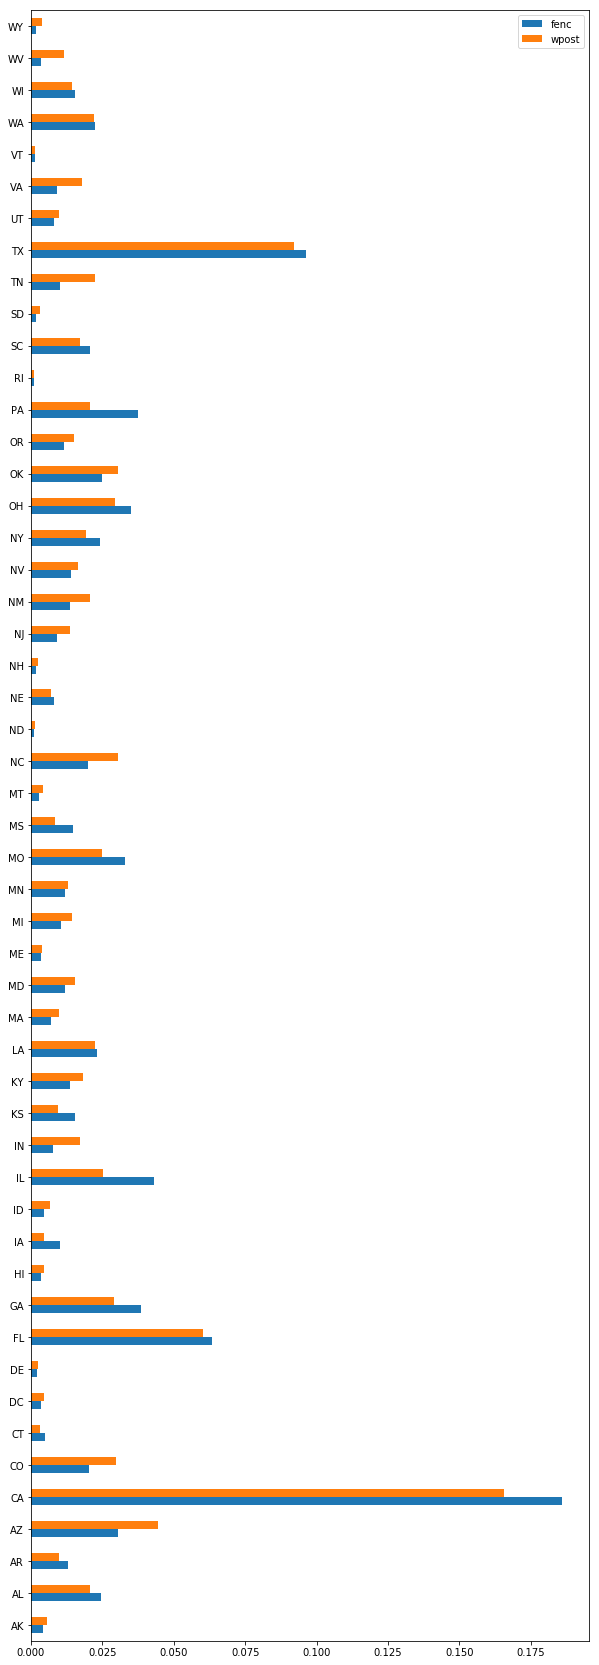

In [95]:
compare_df.plot.barh(figsize=(10,30))

In [100]:
diff[diff > 0].shape

(21,)

In [124]:
texas = fenc[fenc['Location of death (state)'] == 'TX']
california = fenc[fenc['Location of death (state)'] == 'CA']

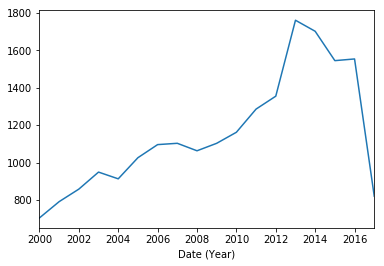

In [109]:
fenc.groupby('Date (Year)')['Unique identifier'].count().plot()

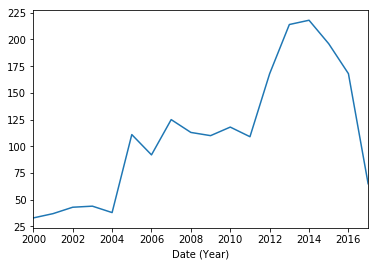

In [108]:
texas.groupby('Date (Year)')['Unique identifier'].count().plot()

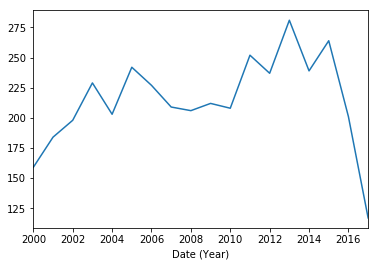

In [111]:
california.groupby('Date (Year)')['Unique identifier'].count().plot()

In [125]:
texas = texas[~texas["Subject's age"].isnull()]


,Timestamp,Subject's name,Subject's age,Subject's gender,Subject's race,URL of image of deceased,Date of injury resulting in death (month/day/year),Location of injury (address),Location of death (city),Location of death (state),...,Official disposition of death (justified or other),Link to news article or photo of official document,Symptoms of mental illness?,Unique identifier/submitted by,"State Data Status Prior to Jan. 1, 2013. All states complete after Jan. 1, 2013",Date&Description,20791,Unique identifier,Date (Year),date
84,75.0,Howard Love,29,Male,African-American/Black,NaN,"February 15, 2000",6543 Hogue St,Houston,TX,...,Unreported,https://drive.google.com/file/d/0B_YUrB_q0WyCV...,Unknown,Cox,Complete,"2/15/2000: According to HPD, Love choked an of...",NaN,75.0,2000,2017-06-26
113,103.0,Jaime Santiago,23,Male,Hispanic/Latino,NaN,"March 5, 2000",9225 Long Point Rd,Houston,TX,...,Unreported,https://drive.google.com/file/d/0B_YUrB_q0WyCV...,Unknown,Cox,Complete,"3/5/2000: According to HPD, an officer respond...",NaN,103.0,2000,2017-06-26
149,135.0,Joseph Blackburn,20,Male,Race unspecified,NaN,"March 24, 2000",2717 Roosevelt Ave,San Antonio,TX,...,Suicide,http://blog.mysanantonio.com/police/2008/03/lo...,No,Cox,Complete,3/24/2000: Officers went to a Budget Inn Motel...,NaN,135.0,2000,2017-06-26
162,145.0,Steven Scott,40,Male,African-American/Black,NaN,"March 31, 2000",E 13th St & Salina St,Austin,TX,...,Unreported,https://docs.google.com/document/d/1FHPE7KryNM...,Unknown,Cox,Complete,3/31/2000: Officer Michael Olsen and eight oth...,NaN,145.0,2000,2017-06-26
188,174.0,David Rodriguez,19,Male,Race unspecified,NaN,"April 16, 2000",U.S. 385 and FM 300,Levelland,TX,...,Grand jury/No bill or Cleared,http://lubbockonline.com/stories/050200/loc_05...,No,Cox,Complete,4/16/2000: State troopers pursued Rodriguez's ...,NaN,174.0,2000,2017-06-26
194,180.0,Lanny Blaine Robinson,49,Male,European-American/White,NaN,"April 19, 2000",6900 Gulf Fwy,Houston,TX,...,Civil suit/Family awarded money,http://www.chron.com/news/houston-texas/articl...,Drug or alcohol use,Cox,Complete,4/19/2000: Robinson offered to show undercover...,NaN,180.0,2000,2017-06-26
199,185.0,Herberto Cardona,40,Male,Race unspecified,NaN,"April 24, 2000",NW 4th Ave & N Madison St,Amarillo,TX,...,Grand jury/No bill or Cleared,http://amarillo.com/stories/2000/04/25/new_man...,Unknown,0/@CRDeCeros/Cox,Complete,"4/24/2000: Cardona urinated in a park, exposin...",NaN,185.0,2000,2017-06-26
273,255.0,Victoria Rivera,36,Female,Race unspecified,NaN,"June 2, 2000",607 Richey St.,Pasadena,TX,...,Unreported,http://www.yourhoustonnews.com/archives/may-ju...,Yes,0/@CRDeCeros/Cox,Complete,"6/2/2000: Rivera, suicidal, threatened herself...",NaN,255.0,2000,2017-06-26
290,272.0,Mayere Tilmon,15,Female,Race unspecified,NaN,"June 11, 2000",10920 Composite Dr,Dallas,TX,...,Unreported,http://amarillo.com/stories/2000/06/12/tex_tee...,No,0/@CRDeCeros/Cox,Complete,6/11/2000: Off-duty constables and officers wo...,NaN,272.0,2000,2017-06-26
300,282.0,John Allen Smith,27,Male,European-American/White,NaN,"June 16, 2000",NaN,Garland,TX,...,Unreported,http://amarillo.com/stories/2000/12/26/new_twe...,Unknown,0/@CRDeCeros/Cox,Complete,6/16/2000: Smith led Officers Jason Riddlespur...,NaN,282.0,2000,2017-06-26


In [131]:
texas["Subject's age"].isnull().sum()
texas["Subject's age"] = texas["Subject's age"].convert_objects(convert_numeric=True)

/home/walrus/.virtualenvs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


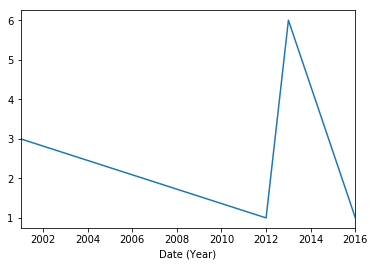

In [132]:
texas[(texas["Subject's age"] > 10) & (texas["Subject's age"] < 15)].groupby('Date (Year)')['Unique identifier'].count().plot()

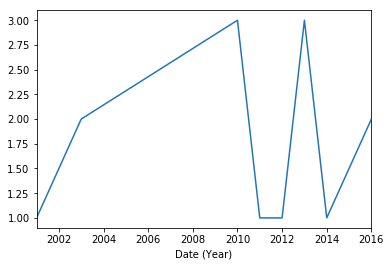

In [133]:
texas[(texas["Subject's age"] > 10) & (texas["Subject's age"] < 15)].groupby('Date (Year)')['Unique identifier'].count().plot()

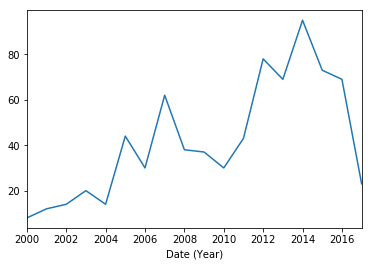

In [138]:
texas[(texas["Subject's age"] > 31) & (texas["Subject's age"] < 50)].groupby('Date (Year)')['Unique identifier'].count().plot()

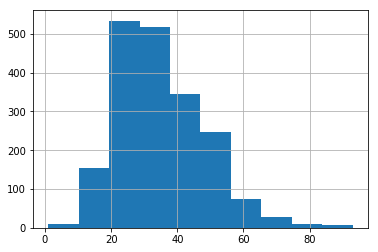

In [140]:
texas["Subject's age"].value

In [141]:
states_dirs = !ls ../../districts/states/

In [143]:
ak = open('../../districts/states/AK/shape.geojson')

In [144]:
type(ak)

_io.TextIOWrapper

In [145]:
ak = ak.read()

In [151]:
states_geojson = {}

for state in states_dirs:
    if state != 'kml':
        states_geojson[state] = open('../../districts/states/{}/shape.geojson'.format(state)).read()

In [184]:
states_df = pd.DataFrame.from_dict({'state': list(states_geojson.keys()), 'the_geom': list(states_geojson.values())})

In [175]:
states_df.iloc[10]['state'], states_df.iloc[10]['map'][:300]

('IL',
 '{ "type": "MultiPolygon", "coordinates": [ [ [ [ -90.715977, 39.191468 ], [ -90.717404, 39.197414 ], [ -90.717585, 39.200182 ], [ -90.717427, 39.202791 ], [ -90.716677, 39.206723 ], [ -90.716597, 39.210414 ], [ -90.717113, 39.213912 ], [ -90.721835, 39.224108 ], [ -90.721975, 39.225198 ], [ -90.7211')

In [176]:
states_geojson['IL'][:300]

'{ "type": "MultiPolygon", "coordinates": [ [ [ [ -90.715977, 39.191468 ], [ -90.717404, 39.197414 ], [ -90.717585, 39.200182 ], [ -90.717427, 39.202791 ], [ -90.716677, 39.206723 ], [ -90.716597, 39.210414 ], [ -90.717113, 39.213912 ], [ -90.721835, 39.224108 ], [ -90.721975, 39.225198 ], [ -90.7211'

In [185]:
states_df.to_csv('us_states.csv')

In [188]:
fenc_states = fenc.groupby('Location of death (state)')['Unique identifier'].count()

In [189]:
map_count = pd.concat([states_df, fenc_states], axis=1)

In [199]:
states_df['count'] = fenc_states

pandas.core.series.Series

In [186]:
!mv us_states.csv us2_states.csv

In [149]:
for state in fenc_states.index:
    compare_df[state].append((fenc_states[state], wpost_states[state]))

KeyError: 'CA'

In [75]:
compare_df

,fenc,wpost
CA,NaN,NaN
TX,NaN,NaN
FL,NaN,NaN
IL,NaN,NaN
GA,NaN,NaN
PA,NaN,NaN
OH,NaN,NaN
MO,NaN,NaN
AZ,NaN,NaN
OK,NaN,NaN


In [15]:
fenc.describe ( include = ['O'])

,Subject's name,Subject's age,Subject's gender,Subject's race,URL of image of deceased,Date of injury resulting in death (month/day/year),Location of injury (address),Location of death (city),Location of death (state),Location of death (zip code),Location of death (county),Agency responsible for death,Cause of death,A brief description of the circumstances surrounding the death,Official disposition of death (justified or other),Link to news article or photo of official document,Symptoms of mental illness?,Unique identifier/submitted by,"State Data Status Prior to Jan. 1, 2013. All states complete after Jan. 1, 2013",Date&Description
count,20792,20207,20757,20791,7084,20792,20315,20755,20791,20612,20778,20745,20791,20791,20765,20790,20732,15081,20792,20757
unique,20041,122,3,8,7008,5974,19121,4891,51,8590,1363,5829,15,19830,54,19293,4,827,3,19868
top,Name withheld by police,22,Male,Race unspecified,http://pursuitsafety.org/images/4_killed_phill...,"February 19, 2003",2347 S. Michigan Ave.,Chicago,CA,60616,Los Angeles,Chicago Police Department,Gunshot,"On February 19, 2003, 21 people were killed an...",Unreported,http://www.usatoday.com/pages/interactives/bla...,No,CRDeCeros,Complete,"2/19/2003: On February 19, 2003, 21 people wer..."
freq,593,730,18827,8061,3,23,21,401,3868,31,1045,373,14809,21,9091,132,12795,3604,19505,21


In [24]:
n = 'February 09, 2003'

In [25]:
dt.datetime.strptime(n,'%B %d, %Y')

datetime.datetime(2003, 2, 9, 0, 0)

In [25]:
for i, row in fenc.iterrows():
    n = row['Date of injury resulting in death (month/day/year)']
    fenc['date'] = dt.datetime.strptime(n,'%B %d, %Y')

In [24]:
fencb = fenc.copy()

In [ ]:
fenc[fencb[]]